In [3]:
# import different libraries
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import seaborn as sns
%matplotlib inline

In [4]:
new_df = pd.read_csv('final_dataset3.csv')
new_df = new_df.drop(['Unnamed: 0', 'Organization Name URL', ], axis=1)
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66721 entries, 0 to 66720
Data columns (total 17 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   Organization Name                       66720 non-null  object
 1   CB Rank (Company)                       66721 non-null  object
 2   Headquarters Regions                    66721 non-null  object
 3   Category Groups                         66721 non-null  object
 4   Number of Founders                      66721 non-null  object
 5   Founders                                66721 non-null  object
 6   Number of Employees                     58894 non-null  object
 7   Number of Funding Rounds                66721 non-null  object
 8   Last Funding Type                       66721 non-null  object
 9   Total Funding Amount                    66719 non-null  object
 10  Total Funding Amount Currency           66721 non-null  object
 11  To

/usr/lib/python3/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (6,9,11,13) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
new_df = new_df.drop_duplicates(subset=['Organization Name'])
new_df.shape

(66152, 17)

In [6]:
new_df = new_df[new_df['Group Gender'].notnull()]
new_df.shape

(29501, 17)

In [7]:
new_df.head()

,Organization Name,CB Rank (Company),Headquarters Regions,Category Groups,Number of Founders,Founders,Number of Employees,Number of Funding Rounds,Last Funding Type,Total Funding Amount,Total Funding Amount Currency,Total Funding Amount Currency (in USD),Organization,Names,Group Gender,Genders,Job Titles
1,Baetes,"80,003","European Union (EU), Nordic Countries, Scandin...","Clothing and Apparel, Commerce and Shopping, D...",3,"Erik Sjoberg, Filip Waak, Fredrik Heiding",NaN,1,Convertible Note,32000,EUR,39572,Baetes,"['Erik Sjoberg', 'Erik Sjoberg']",Male only,"['Male', 'Male']","['Founder & CEO', 'Founder & CEO']"
3,Rendy.io,"80,009",Latin America,"Commerce and Shopping, Hardware, Sales and Mar...",2,"Gerardo Mora, Israel Medina",1-10,2,Seed,100000,USD,100000,Rendy.io,"['Israel Medina', 'Israel Medina']",Male only,"['Male', 'Male']","['Founder & CEO', 'Founder & CEO']"
9,Leap,"80,020",European Union (EU),"Internet Services, Sports",5,"Christo Peev, Felix Quinton, Georgi Karadzhov,...",11-50,3,Seed,60000,EUR,79761,Leap,"['Amish Tolia', 'Remco van den Elzen', 'Christ...",Male only,"['Male', 'Male', 'Male', 'Male', 'Male', 'Male']","['Founder & CEO', 'Founder & COO', 'Other Foun..."
13,Wekho,"80,035","Greater Miami Area, East Coast, Southern US","Apps, Internet Services, Media and Entertainme...",1,Fedor Saldivia,1-10,3,Seed,350000,USD,350000,Wekho,"['Fedor Saldivia', 'Fedor Saldivia']",Male only,"['Male', 'Male']","['Founder & CEO', 'Founder & CEO']"
16,Intelline,"80,038",Great Lakes,"Energy, Manufacturing, Science and Engineering...",2,"Chris Mathew, Kyle Faller",1-10,2,Grant,15000,CAD,11391,Intelline,Kyle Faller,Male only,Male,Founder & CEO


In [8]:
new_df['Number of Funding Rounds'] = new_df['Number of Funding Rounds'].astype(float)
new_df['Number of Founders'] = new_df['Number of Founders'].astype(float)
new_df['Total Funding Amount Currency (in USD)'] = new_df['Total Funding Amount Currency (in USD)'].astype(float)
new_df['Total Funding Amount'] = new_df['Total Funding Amount'].astype(float)

In [9]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29501 entries, 1 to 66720
Data columns (total 17 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Organization Name                       29501 non-null  object 
 1   CB Rank (Company)                       29501 non-null  object 
 2   Headquarters Regions                    29501 non-null  object 
 3   Category Groups                         29501 non-null  object 
 4   Number of Founders                      29501 non-null  float64
 5   Founders                                29501 non-null  object 
 6   Number of Employees                     27145 non-null  object 
 7   Number of Funding Rounds                29501 non-null  float64
 8   Last Funding Type                       29501 non-null  object 
 9   Total Funding Amount                    29501 non-null  float64
 10  Total Funding Amount Currency           29501 non-null  ob

In [10]:
new_df['Last Funding Type'].unique()

array(['Convertible Note', 'Seed', 'Grant', 'Equity Crowdfunding',
       'Angel', 'Debt Financing', 'Pre-Seed', 'Venture - Series Unknown',
       'Product Crowdfunding', 'Non-equity Assistance', 'Series B',
       'Series C', 'Private Equity', 'Undisclosed', 'Post-IPO Equity',
       'Series A', 'Series E', 'Corporate Round', 'Initial Coin Offering',
       'Series D', 'Post-IPO Debt', 'Series F', 'Secondary Market',
       'Series H', 'Series G', 'Series I', 'Series J',
       'Post-IPO Secondary'], dtype=object)

In [11]:
null = new_df['Category Groups'].notnull()
new_df = new_df[null]
new_df.shape

(29501, 17)

In [12]:
null = new_df['Headquarters Regions'].notnull()
new_df = new_df[null]
new_df.shape

(29501, 17)

Female only     2350
Male only      25100
Mixed           2051
Name: Group Gender, dtype: int64


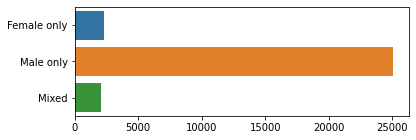

In [13]:
categories_counts= new_df['Group Gender'].value_counts().sort_index()
plt.figure(figsize=(6,2))
sns.barplot(y=categories_counts.index, x=categories_counts.values)
print(categories_counts)

In [14]:
df_cat = pd.concat([pd.Series(row['Total Funding Amount Currency (in USD)'], row['Category Groups'].split(','))              
                    for _, row in new_df.iterrows()]).reset_index()

In [15]:
# cat_dict = {'Company':[], 'Founders Gender':[], 'Total Funding':[]}
# for _, row in new_df.iterrows():
#     cat_dict['Company'].append(row[])

In [16]:
df_cat.rename(columns={'index':'Category', '0':'Total Funding'}, 
                 inplace=True)

In [17]:
len(df_cat)

104748

In [18]:
df_cat.head()

,Category,0
0,Clothing and Apparel,39572.0
1,Commerce and Shopping,39572.0
2,Design,39572.0
3,Commerce and Shopping,100000.0
4,Hardware,100000.0


In [19]:
cb_categories = df_cat['Category'].unique()
print(cb_categories)
print(len(cb_categories))

['Clothing and Apparel' ' Commerce and Shopping' ' Design'
 'Commerce and Shopping' ' Hardware' ' Sales and Marketing' ' Software'
 'Internet Services' ' Sports' 'Apps' ' Internet Services'
 ' Media and Entertainment' ' Travel and Tourism' ' Video' 'Energy'
 ' Manufacturing' ' Science and Engineering' ' Sustainability'
 'Health Care' ' Consumer Electronics' ' Consumer Goods' ' Health Care'
 ' Content and Publishing' ' Mobile' 'Information Technology'
 ' Information Technology' 'Community and Lifestyle' ' Real Estate'
 'Biotechnology' ' Messaging and Telecommunications' ' Platforms'
 ' Privacy and Security' 'Content and Publishing' 'Consumer Goods'
 'Hardware' 'Consumer Electronics' ' Transportation' ' Education' 'Gaming'
 ' Financial Services' 'Travel and Tourism' 'Data and Analytics'
 ' Professional Services' ' Payments' 'Advertising' 'Education'
 ' Community and Lifestyle' ' Music and Audio' ' Food and Beverage'
 'Manufacturing' 'Media and Entertainment' 'Real Estate'
 'Financial Ser

In [20]:
df_cat['Category'] = df_cat['Category'].str.strip()

In [21]:
cb_categories = df_cat['Category'].unique()
print(cb_categories)
print(len(cb_categories))

['Clothing and Apparel' 'Commerce and Shopping' 'Design' 'Hardware'
 'Sales and Marketing' 'Software' 'Internet Services' 'Sports' 'Apps'
 'Media and Entertainment' 'Travel and Tourism' 'Video' 'Energy'
 'Manufacturing' 'Science and Engineering' 'Sustainability' 'Health Care'
 'Consumer Electronics' 'Consumer Goods' 'Content and Publishing' 'Mobile'
 'Information Technology' 'Community and Lifestyle' 'Real Estate'
 'Biotechnology' 'Messaging and Telecommunications' 'Platforms'
 'Privacy and Security' 'Transportation' 'Education' 'Gaming'
 'Financial Services' 'Data and Analytics' 'Professional Services'
 'Payments' 'Advertising' 'Music and Audio' 'Food and Beverage'
 'Natural Resources' 'Artificial Intelligence' 'Navigation and Mapping'
 'Events' 'Government and Military' 'Administrative Services'
 'Lending and Investments' 'Agriculture and Farming']
46


Software                            14116
Internet Services                    7319
Information Technology               5994
Health Care                          5017
Data and Analytics                   4960
Science and Engineering              4858
Hardware                             4779
Mobile                               4317
Commerce and Shopping                4287
Media and Entertainment              4210
Financial Services                   3617
Sales and Marketing                  2867
Apps                                 2661
Artificial Intelligence              2410
Consumer Electronics                 2078
Transportation                       1954
Biotechnology                        1931
Design                               1609
Education                            1582
Community and Lifestyle              1530
Real Estate                          1461
Food and Beverage                    1372
Advertising                          1288
Privacy and Security              

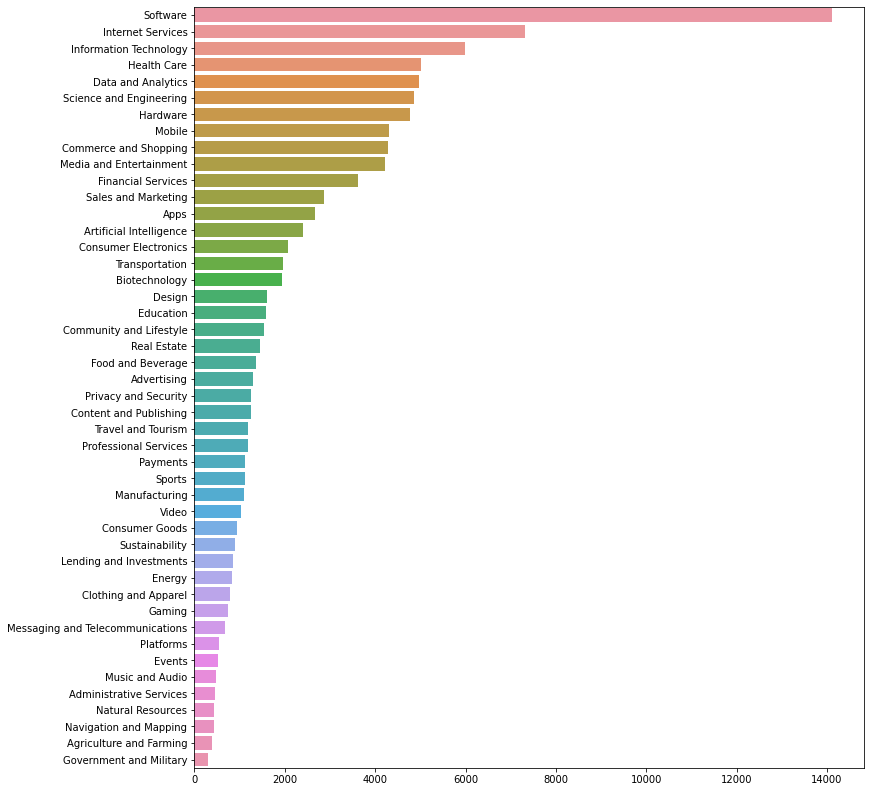

In [22]:
categories_counts= df_cat['Category'].value_counts()
plt.figure(figsize=(12,14))
sns.barplot(y=categories_counts.index, x=categories_counts.values)
print(categories_counts)

In [23]:
#simplifying categories
df_cat.loc[df_cat['Category'].str.contains('Finance|FinTech|Financial|Banking', case=False), 'Main Category'] = 'Finance'
df_cat.loc[df_cat['Category'].str.contains('Biotechnology', case=False), 'Main Category'] = 'Biotechnology'
df_cat.loc[df_cat['Category'].str.contains('Health Care', case=False), 'Main Category'] = 'Health Care'
df_cat.loc[df_cat['Category'].str.contains('E-Commerce|Commerce', case=False), 'Main Category'] = 'Commerce'
df_cat.loc[df_cat['Category'].str.contains('Software', case=False), 'Main Category'] = 'Software'
df_cat.loc[df_cat['Category'].str.contains('Internet', case=False), 'Main Category'] = 'Internet'
df_cat.loc[df_cat['Category'].str.contains('Information Technology', case=False), 'Main Category'] = 'Information Technology'
df_cat.loc[df_cat['Category'].str.contains('Education', case=False), 'Main Category'] = 'Education'
df_cat.loc[df_cat['Category'].str.contains('Network Security|Cyber Security', case=False), 'Main Category'] = 'Security'
df_cat.loc[df_cat['Category'].str.contains('Real Estate', case=False), 'Main Category'] = 'Real Estate'
df_cat.loc[df_cat['Category'].str.contains('Tourism', case=False), 'Main Category'] = 'Tourism'
df_cat.loc[df_cat['Category'].str.contains('Artificial Intelligence', case=False), 'Main Category'] = 'Artificial Intelligence'
df_cat.loc[df_cat['Category'].str.contains('Food', case=False), 'Main Category'] = 'Food'
df_cat.loc[df_cat['Category'].str.contains('Advertising', case=False), 'Main Category'] = 'Advertising'
df_cat.loc[df_cat['Category'].str.contains('Fashion', case=False), 'Main Category'] = 'Fashion'
df_cat.loc[df_cat['Category'].str.contains('Data', case=False), 'Main Category'] = 'Data'
df_cat.loc[df_cat['Category'].str.contains('Robotics', case=False), 'Main Category'] = 'Robotics'
df_cat.loc[df_cat['Category'].str.contains('Gaming', case=False), 'Main Category'] = 'Gaming'
df_cat.loc[df_cat['Category'].str.contains('Sports', case=False), 'Main Category'] = 'Sports'
df_cat.loc[df_cat['Category'].str.contains('Entertainment', case=False), 'Main Category'] = 'Entertainment'
df_cat.loc[df_cat['Category'].str.contains('Insurance', case=False), 'Main Category'] = 'Insurance'
df_cat.loc[df_cat['Category'].str.contains('Energy', case=False), 'Main Category'] = 'Energy'
df_cat.loc[df_cat['Category'].str.contains('Manufacturing', case=False), 'Main Category'] = 'Manufacturing'

In [24]:
df_cat.head()

,Category,0,Main Category
0,Clothing and Apparel,39572.0,NaN
1,Commerce and Shopping,39572.0,Commerce
2,Design,39572.0,NaN
3,Commerce and Shopping,100000.0,Commerce
4,Hardware,100000.0,NaN


In [28]:
 def compute_percentage(x, column_values):
      pct = float(x/column_values.sum()) * 100
      return round(pct, 2)

19
Software                   0.218761
Internet                   0.113425
Information Technology     0.092891
Health Care                0.077750
Data                       0.076867
Commerce                   0.066437
Entertainment              0.065244
Finance                    0.056054
Artificial Intelligence    0.037349
Biotechnology              0.029925
Education                  0.024517
Real Estate                0.022642
Food                       0.021262
Advertising                0.019961
Tourism                    0.018364
Sports                     0.017249
Manufacturing              0.016954
Energy                     0.012785
Gaming                     0.011561
Name: Main Category, dtype: float64


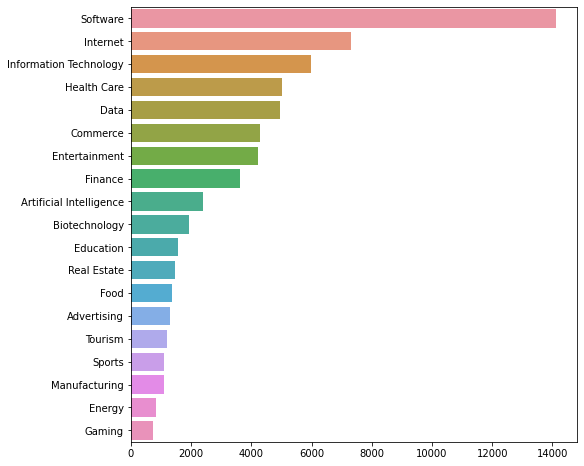

In [31]:
categories_counts= df_cat['Main Category'].value_counts()
plt.figure(figsize=(8,8))
sns.barplot(y=categories_counts.index, x=categories_counts.values)
print(len(categories_counts))
print(categories_counts/categories_counts.sum())

In [24]:
# categories = ['Software','Finance','Health Care','Internet','Biotechnology','Commerce','Information Technology','Entertainment','Tourism',
# 'Food','Real Estate','Energy','Advertising','Education','Gaming','Manufacturing','Transportation','Data','Sports']
for i in cb_categories:
    gender_Categories = df_cat[df_cat['Category'] == i]
    categories_counts= gender_Categories['Group Gender'].value_counts().sort_index()
    plt.figure(figsize=(6,2))
    plt.title(i)
    sns.barplot(y=categories_counts.index, x=categories_counts.values)

KeyError: 'Group Gender'

In [ ]:
#simplifying regions
new_df.loc[new_df['Headquarters Regions'].str.contains('Asia-Pacific', case=False), 'Headquarters Regions'] = 'APAC'
new_df.loc[new_df['Headquarters Regions'].str.contains('European Union', case=False), 'Headquarters Regions'] = 'EU'
new_df.loc[new_df['Headquarters Regions'].str.contains('San Francisco Bay Area', case=False), 'Headquarters Regions'] = 'Bay'
new_df.loc[new_df['Headquarters Regions'].str.contains('Greater New York Area, East Coast, Northeastern US', case=False), 'Headquarters Regions'] = 'NY'
new_df.loc[new_df['Headquarters Regions'].str.contains('Greater Boston Area, East Coast, New England', case=False), 'Headquarters Regions'] = 'BS'
new_df.loc[new_df['Headquarters Regions'].str.contains('Greater Los Angeles Area, West Coast, Western US', case=False), 'Headquarters Regions'] = 'LA'

In [ ]:
new_df = new_df[(new_df['Headquarters Regions'] == 'EU')| (new_df['Headquarters Regions'] == 'Bay')| (new_df['Headquarters Regions'] == 'APAC')| (new_df['Headquarters Regions'] == 'NY')| (new_df['Headquarters Regions'] == 'LA')| (new_df['Headquarters Regions'] == 'BS')]
new_df

In [ ]:
categories_counts= new_df['Headquarters Regions'].value_counts()
plt.figure(figsize=(8,8))
sns.barplot(y=categories_counts.index, x=categories_counts.values)
print(categories_counts)

In [ ]:
#creating subdatasets for the top 6 regions
data_EU = new_df[new_df['Headquarters Regions'] == 'EU']
data_Bay = new_df[new_df['Headquarters Regions'] == 'Bay']
data_APAC = new_df[new_df['Headquarters Regions'] == 'APAC']
data_NY = new_df[new_df['Headquarters Regions'] == 'NY']
data_LA = new_df[new_df['Headquarters Regions'] == 'LA']
data_BO = new_df[new_df['Headquarters Regions'] == 'BS']

In [ ]:
plt.figure(figsize=(17,8))
ax = sns.countplot(x='Headquarters Regions', hue='Group Gender', data=new_df, order=["Bay", "EU", "APAC", "NY", "LA", "BS"], hue_order=["Female only", "Male only", "Mixed"])
ax.axes.set_title("Number of companies by region", fontsize=22)
plt.setp(ax.get_xticklabels(), rotation=0, fontsize=10)
plt.legend(fontsize=15, title="Regions");

# fig, axes = plt.subplots(nrows=3, ncols=2,figsize=(13,10))

# categories_counts= data_EU['Group Gender'].value_counts().sort_index()
# sns.barplot(y=categories_counts.index, x=categories_counts.values, ax=axes[0,0])
# axes[0,0].set_title('EU')

# categories_counts= data_Bay['Group Gender'].value_counts().sort_index()
# sns.barplot(y=categories_counts.index, x=categories_counts.values, ax=axes[0,1])
# axes[0,1].set_title('Bay')

# categories_counts= data_APAC['Group Gender'].value_counts().sort_index()
# sns.barplot(y=categories_counts.index, x=categories_counts.values, ax=axes[1,0])
# axes[1,0].set_title('APAC')

# categories_counts= data_NY['Group Gender'].value_counts().sort_index()
# sns.barplot(y=categories_counts.index, x=categories_counts.values, ax=axes[1,1])
# axes[1,1].set_title('NY')

# categories_counts= data_LA['Group Gender'].value_counts().sort_index()
# sns.barplot(y=categories_counts.index, x=categories_counts.values, ax=axes[2,0])
# axes[2,0].set_title('LA')

# categories_counts= data_BO['Group Gender'].value_counts().sort_index()
# sns.barplot(y=categories_counts.index, x=categories_counts.values, ax=axes[2,1])
# axes[2,1].set_title('BO')

# fig.tight_layout()

In [ ]:
col_names =  ['Region', 'Total Funding', 'Average Funding', 'Top 10 Average Funding']
funding  = pd.DataFrame(columns = col_names)
funding.loc[0] = ['Bay', data_Bay['Total Funding Amount Currency (in USD)'].sum(), data_Bay['Total Funding Amount Currency (in USD)'].sum()/len(data_Bay), data_Bay['Total Funding Amount Currency (in USD)'].nlargest(10).sum()/10]
funding.loc[1] = ['EU', data_EU['Total Funding Amount Currency (in USD)'].sum(), data_EU['Total Funding Amount Currency (in USD)'].sum()/len(data_EU), data_EU['Total Funding Amount Currency (in USD)'].nlargest(10).sum()/10]
funding.loc[2] = ['APAC', data_APAC['Total Funding Amount Currency (in USD)'].sum(), data_APAC['Total Funding Amount Currency (in USD)'].sum()/len(data_APAC), data_APAC['Total Funding Amount Currency (in USD)'].nlargest(10).sum()/10]
funding.loc[3] = ['NY', data_NY['Total Funding Amount Currency (in USD)'].sum(), data_NY['Total Funding Amount Currency (in USD)'].sum()/len(data_NY), data_NY['Total Funding Amount Currency (in USD)'].nlargest(10).sum()/10]
funding.loc[4] = ['LA', data_LA['Total Funding Amount Currency (in USD)'].sum(), data_LA['Total Funding Amount Currency (in USD)'].sum()/len(data_LA), data_LA['Total Funding Amount Currency (in USD)'].nlargest(10).sum()/10]
funding.loc[5] = ['BS', data_BO['Total Funding Amount Currency (in USD)'].sum(), data_BO['Total Funding Amount Currency (in USD)'].sum()/len(data_BO), data_BO['Total Funding Amount Currency (in USD)'].nlargest(10).sum()/10]
funding = funding.sort_values('Total Funding', ascending=False).sort_index()
funding.plot.bar(x='Region', y='Total Funding', rot=0)
funding = funding.sort_values('Average Funding', ascending=False).sort_index()
funding.plot.bar(x='Region', y='Average Funding', rot=0)
funding = funding.sort_values('Top 10 Average Funding', ascending=False).sort_index()
funding.plot.bar(x='Region', y='Top 10 Average Funding', rot=0)

In [ ]:
#average vs total bay/apac (too many comapines in Bay area)
Bay_10 = data_Bay.sort_values('Total Funding Amount Currency (in USD)', ascending=False).head(10)
rg = Bay_10.plot.bar(x='Organization Name', y='Total Funding Amount Currency (in USD)', rot=0, figsize=(10,5),title = 'Bay Top 10')
plt.setp(rg.get_xticklabels(), rotation=90)

EU_10 = data_EU.sort_values('Total Funding Amount Currency (in USD)', ascending=False).head(10)
rg = EU_10.plot.bar(x='Organization Name', y='Total Funding Amount Currency (in USD)', rot=0, figsize=(10,5),title = 'EU Top 10')
plt.setp(rg.get_xticklabels(), rotation=90)

APAC_10 = data_APAC.sort_values('Total Funding Amount Currency (in USD)', ascending=False).head(10)
rg = APAC_10.plot.bar(x='Organization Name', y='Total Funding Amount Currency (in USD)', rot=0, figsize=(10,5),title = 'APAC Top 10')
plt.setp(rg.get_xticklabels(), rotation=90)

NY_10 = data_NY.sort_values('Total Funding Amount Currency (in USD)', ascending=False).head(10)
rg = NY_10.plot.bar(x='Organization Name', y='Total Funding Amount Currency (in USD)', rot=0, figsize=(10,5),title = 'NY Top 10')
plt.setp(rg.get_xticklabels(), rotation=90)

LA_10 = data_LA.sort_values('Total Funding Amount Currency (in USD)', ascending=False).head(10)
rg = LA_10.plot.bar(x='Organization Name', y='Total Funding Amount Currency (in USD)', rot=0, figsize=(10,5),title = 'LA Top 10')
plt.setp(rg.get_xticklabels(), rotation=90)

BO_10 = data_BO.sort_values('Total Funding Amount Currency (in USD)', ascending=False).head(10)
rg = BO_10.plot.bar(x='Organization Name', y='Total Funding Amount Currency (in USD)', rot=0, figsize=(10,5),title = 'BO Top 10')
plt.setp(rg.get_xticklabels(), rotation=90)

In [ ]:
cats = ['Software','Finance','Health Care','Internet','Biotechnology','Commerce','Information Technology','Entertainment','Tourism',
'Food','Real Estate','Energy','Advertising','Education','Gaming','Manufacturing','Transportation','Data','Sports']

df_cat = new_df[new_df['Category Groups'] == 'Software']
for i in cats:
    df = new_df[new_df['Category Groups'] == i]
    df_cat = df_cat.append(df)

regions = ['EU','APAC', 'NY', 'LA','BS']

df_cat_reg = df_cat[df_cat['Headquarters Regions'] == 'Bay']
for i in regions:
    df = df_cat[df_cat['Headquarters Regions'] == i]
    df_cat_reg = df_cat_reg.append(df)

In [ ]:
plt.figure(figsize=(17,8))
ax = sns.countplot(x='Category Groups', hue='Headquarters Regions', data=df_cat_reg)
ax.axes.set_title("Breakdown of Categories by Regions", fontsize=22)
plt.setp(ax.get_xticklabels(), rotation=90, fontsize=10)
plt.legend(fontsize=15, title="Regions");

In [ ]:
#creating subdatasets for the top 6 regions
data_EU_cat = df_cat[df_cat['Headquarters Regions'] == 'EU']
data_Bay_cat = df_cat[df_cat['Headquarters Regions'] == 'Bay']
data_APAC_cat = df_cat[df_cat['Headquarters Regions'] == 'APAC']
data_NY_cat = df_cat[df_cat['Headquarters Regions'] == 'NY']
data_LA_cat = df_cat[df_cat['Headquarters Regions'] == 'LA']
data_BO_cat = df_cat[df_cat['Headquarters Regions'] == 'BS']

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=3,figsize=(30,13))

categories_counts= data_Bay_cat['Category Groups'].value_counts()
sns.barplot(y=categories_counts.index, x=categories_counts.values, ax=axes[0,0])
axes[0,0].set_title('Bay')

categories_counts= data_EU_cat['Category Groups'].value_counts()
sns.barplot(y=categories_counts.index, x=categories_counts.values, ax=axes[0,1])
axes[0,1].set_title('EU')

categories_counts= data_APAC_cat['Category Groups'].value_counts()
sns.barplot(y=categories_counts.index, x=categories_counts.values, ax=axes[0,2])
axes[0,2].set_title('APAC')

categories_counts= data_NY_cat['Category Groups'].value_counts()
sns.barplot(y=categories_counts.index, x=categories_counts.values, ax=axes[1,0])
axes[1,0].set_title('NY')

categories_counts= data_LA_cat['Category Groups'].value_counts()
sns.barplot(y=categories_counts.index, x=categories_counts.values, ax=axes[1,1])
axes[1,1].set_title('LA')

categories_counts= data_BO_cat['Category Groups'].value_counts()
sns.barplot(y=categories_counts.index, x=categories_counts.values, ax=axes[1,2])
axes[1,2].set_title('BS')

fig.tight_layout()

In [ ]:
categories_counts= new_df['Number of Funding Rounds'].value_counts().sort_index()
plt.figure(figsize=(15,7))
plt.title('Number of Funding Rounds')
categories_counts.plot.bar(x='Number of Funding Rounds', rot=0)
print(categories_counts)

In [ ]:
categories_counts= new_df['Last Funding Type'].value_counts()
plt.figure(figsize=(15,7))
plt.title('Last Funding Type')
categories_counts.plot.bar(x='Last Funding Type', rot=90)
print(categories_counts)

In [ ]:
categories_counts= data_EU['Number of Funding Rounds'].value_counts().sort_index()
plt.figure(figsize=(15,7))
categories_counts.plot.bar(x='Number of Funding Rounds', rot=0,title = 'EU')

categories_counts= data_Bay['Number of Funding Rounds'].value_counts().sort_index()
plt.figure(figsize=(15,7))
categories_counts.plot.bar(x='Number of Funding Rounds', rot=0,title = 'Bay')

categories_counts= data_APAC['Number of Funding Rounds'].value_counts().sort_index()
plt.figure(figsize=(15,7))
categories_counts.plot.bar(x='Number of Funding Rounds', rot=0,title = 'APAC')

categories_counts= data_LA['Number of Funding Rounds'].value_counts().sort_index()
plt.figure(figsize=(15,7))
categories_counts.plot.bar(x='Number of Funding Rounds', rot=0,title = 'LA')

categories_counts= data_NY['Number of Funding Rounds'].value_counts().sort_index()
plt.figure(figsize=(15,7))
categories_counts.plot.bar(x='Number of Funding Rounds', rot=0,title = 'NY')

categories_counts= data_BO['Number of Funding Rounds'].value_counts().sort_index()
plt.figure(figsize=(15,7))
categories_counts.plot.bar(x='Number of Funding Rounds', rot=0,title = 'BS')

In [ ]:
# categories_counts= new_df['Funding Status'].value_counts().nlargest(30).sort_index()
# plt.figure(figsize=(5,7))
# sns.barplot(y=categories_counts.index, x=categories_counts.values)
# print(categories_counts)

In [ ]:
# fig, axes = plt.subplots(nrows=2, ncols=3,figsize=(20,13))

# categories_counts= data_EU['Funding Status'].value_counts().nlargest(30).sort_index()
# sns.barplot(y=categories_counts.index, x=categories_counts.values, ax=axes[0,0])
# axes[0,0].set_title('EU')

# categories_counts= data_Bay['Funding Status'].value_counts().nlargest(30).sort_index()
# sns.barplot(y=categories_counts.index, x=categories_counts.values, ax=axes[0,1])
# axes[0,1].set_title('Bay')

# categories_counts= data_APAC['Funding Status'].value_counts().nlargest(30).sort_index()
# sns.barplot(y=categories_counts.index, x=categories_counts.values, ax=axes[0,2])
# axes[0,2].set_title('APAC')

# categories_counts= data_LA['Funding Status'].value_counts().nlargest(30).sort_index()
# sns.barplot(y=categories_counts.index, x=categories_counts.values, ax=axes[1,0])
# axes[1,0].set_title('LA')

# categories_counts= data_NY['Funding Status'].value_counts().nlargest(30).sort_index()
# sns.barplot(y=categories_counts.index, x=categories_counts.values, ax=axes[1,1])
# axes[1,1].set_title('NY')

# categories_counts= data_BO['Funding Status'].value_counts().nlargest(30).sort_index()
# sns.barplot(y=categories_counts.index, x=categories_counts.values, ax=axes[1,2])
# axes[1,2].set_title('BO')

# fig.tight_layout()

In [ ]:
# categories_counts= new_df['Estimated Revenue Range'].value_counts().nlargest(30)
# plt.figure(figsize=(5,7))
# sns.barplot(y=categories_counts.index, x=categories_counts.values)
# print(categories_counts)

In [ ]:
# fig, axes = plt.subplots(nrows=2, ncols=3,figsize=(20,13))

# categories_counts= data_EU['Estimated Revenue Range'].value_counts().nlargest(30).sort_index()
# sns.barplot(y=categories_counts.index, x=categories_counts.values, ax=axes[0,0], color="red", saturation=.8)
# axes[0,0].set_title('EU')

# categories_counts= data_Bay['Estimated Revenue Range'].value_counts().nlargest(30).sort_index()
# sns.barplot(y=categories_counts.index, x=categories_counts.values, ax=axes[0,1], color="red", saturation=.8)
# axes[0,1].set_title('Bay')

# categories_counts= data_APAC['Estimated Revenue Range'].value_counts().nlargest(30).sort_index()
# sns.barplot(y=categories_counts.index, x=categories_counts.values, ax=axes[0,2], color="red", saturation=.8)
# axes[0,2].set_title('APAC')

# categories_counts= data_LA['Estimated Revenue Range'].value_counts().nlargest(30).sort_index()
# sns.barplot(y=categories_counts.index, x=categories_counts.values, ax=axes[1,0], color="red", saturation=.8)
# axes[1,0].set_title('LA')

# categories_counts= data_NY['Estimated Revenue Range'].value_counts().nlargest(30).sort_index()
# sns.barplot(y=categories_counts.index, x=categories_counts.values, ax=axes[1,1], color="red", saturation=.8)
# axes[1,1].set_title('NY')

# categories_counts= data_BO['Estimated Revenue Range'].value_counts().nlargest(30).sort_index()
# sns.barplot(y=categories_counts.index, x=categories_counts.values, ax=axes[1,2], color="red", saturation=.8)
# axes[1,2].set_title('BO')

# fig.tight_layout()

In [ ]:
col_names =  [ 'Category' , 'Gender','Total Funding', 'Number of Companies','Average Funding']
categories = ['Software','Finance','Health Care','Internet','Biotechnology','Commerce','Information Technology','Entertainment','Tourism',
'Food','Real Estate','Energy','Advertising','Education','Gaming','Manufacturing','Transportation','Data','Sports']
genders = ['Female only', 'Male only', 'Mixed']

funding  = pd.DataFrame(columns = col_names)
count = 0
for i in categories:
    for j in genders:
            funding.loc[count] = [ i, j, new_df[(new_df['Category Groups']==i)&(new_df['Group Gender']==j)]['Total Funding Amount Currency (in USD)'].sum(),
                          len(new_df[(new_df['Category Groups']==i)&(new_df['Group Gender']==j)]),0]
            if (funding.at[count,'Number of Companies']!= 0):
                funding.at[count,'Average Funding'] = funding.at[count,'Total Funding']/funding.at[count,'Number of Companies']
            count = count + 1

plt.figure(figsize=(17,8))
ax = sns.barplot(x='Category', y='Number of Companies', hue='Gender', data=funding, ci = None, order=['Software','Finance','Health Care','Internet','Biotechnology','Commerce','Information Technology','Entertainment','Tourism',
'Food','Real Estate','Energy','Advertising','Education','Gaming','Manufacturing','Transportation','Data','Sports'], hue_order=["Female only", "Male only", "Mixed"])
ax.axes.set_title("Number of companies distribution by categories and genders", fontsize=22)
plt.setp(ax.get_xticklabels(), rotation=90, fontsize=10)
plt.legend(fontsize=15, title="Genders")

plt.figure(figsize=(17,8))
ax = sns.barplot(x='Category', y='Total Funding', hue='Gender', data=funding, ci = None, order=['Software','Finance','Health Care','Internet','Biotechnology','Commerce','Information Technology','Entertainment','Tourism',
'Food','Real Estate','Energy','Advertising','Education','Gaming','Manufacturing','Transportation','Data','Sports'], hue_order=["Female only", "Male only", "Mixed"])
ax.axes.set_title("Total funding distribution by categories and genders", fontsize=22)
plt.setp(ax.get_xticklabels(), rotation=90, fontsize=10)
plt.legend(fontsize=15, title="Genders")


plt.figure(figsize=(17,8))
ax = sns.barplot(x='Category', y='Average Funding', hue='Gender', data=funding, ci = None, order=['Software','Finance','Health Care','Internet','Biotechnology','Commerce','Information Technology','Entertainment','Tourism',
'Food','Real Estate','Energy','Advertising','Education','Gaming','Manufacturing','Transportation','Data','Sports'], hue_order=["Female only", "Male only", "Mixed"])
ax.axes.set_title("Average funding distribution by categories and genders", fontsize=22)
plt.setp(ax.get_xticklabels(), rotation=90, fontsize=10)
plt.legend(fontsize=15, title="Genders")
# fig, axes = plt.subplots(nrows=3, ncols=2,figsize=(13,15))

# rg=avgfunding_Bay.plot.bar(x='Category', y='Average Funding', rot=0, title = 'Bay', ax=axes[0,0])
# plt.setp(rg.get_xticklabels(), rotation=90)
# rg=avgfunding_APAC.plot.bar(x='Category', y='Average Funding', rot=0, title = 'APAC', ax=axes[0,1])
# plt.setp(rg.get_xticklabels(), rotation=90)
# rg=avgfunding_EU.plot.bar(x='Category', y='Average Funding', rot=0, title = 'EU', ax=axes[1,0])
# plt.setp(rg.get_xticklabels(), rotation=90)
# rg=avgfunding_LA.plot.bar(x='Category', y='Average Funding', rot=0, title = 'LA', ax=axes[1,1])
# plt.setp(rg.get_xticklabels(), rotation=90)
# rg=avgfunding_NY.plot.bar(x='Category', y='Average Funding', rot=0, title = 'NY', ax=axes[2,0])
# plt.setp(rg.get_xticklabels(), rotation=90)
# rg=avgfunding_BO.plot.bar(x='Category', y='Average Funding', rot=0, title = 'BO', ax=axes[2,1])
# plt.setp(rg.get_xticklabels(), rotation=90)


# fig.tight_layout()

# totalfunding_Bay = funding.sort_values('Total Funding', ascending=False).sort_index()
# avgfunding_Bay = funding.sort_values('Average Funding', ascending=False).sort_index()

# count = 0
# for i in categories:
#     funding.loc[count] = ['APAC', i, data_APAC[data_APAC['Categories']==i]['Total Funding Amount Currency (in USD)'].sum(),
#                           len(data_APAC[data_APAC['Categories']==i]), 
#                           data_APAC[data_APAC['Categories']==i]['Total Funding Amount Currency (in USD)'].sum()/
#                           len(data_APAC[data_APAC['Categories']==i])]
#     count = count + 1

# totalfunding_APAC = funding.sort_values('Total Funding', ascending=False).sort_index()
# avgfunding_APAC = funding.sort_values('Average Funding', ascending=False).sort_index()

# count = 0
# for i in categories:
#     funding.loc[count] = ['EU', i, data_EU[data_EU['Categories']==i]['Total Funding Amount Currency (in USD)'].sum(),
#                           len(data_EU[data_EU['Categories']==i]), 
#                           data_EU[data_EU['Categories']==i]['Total Funding Amount Currency (in USD)'].sum()/
#                           len(data_EU[data_EU['Categories']==i])]
#     count = count + 1

# totalfunding_EU = funding.sort_values('Total Funding', ascending=False).sort_index()
# avgfunding_EU = funding.sort_values('Average Funding', ascending=False).sort_index()

# count = 0
# for i in categories:
#     funding.loc[count] = ['LA', i, data_LA[data_LA['Categories']==i]['Total Funding Amount Currency (in USD)'].sum(),
#                           len(data_LA[data_LA['Categories']==i]), 
#                           data_LA[data_LA['Categories']==i]['Total Funding Amount Currency (in USD)'].sum()/
#                           len(data_LA[data_LA['Categories']==i])]
#     count = count + 1

# totalfunding_LA = funding.sort_values('Total Funding', ascending=False).sort_index()
# avgfunding_LA = funding.sort_values('Average Funding', ascending=False).sort_index()

# count = 0
# for i in categories:
#     funding.loc[count] = ['NY', i, data_NY[data_NY['Categories']==i]['Total Funding Amount Currency (in USD)'].sum(),
#                           len(data_NY[data_NY['Categories']==i]), 
#                           data_NY[data_NY['Categories']==i]['Total Funding Amount Currency (in USD)'].sum()/
#                           len(data_NY[data_NY['Categories']==i])]
#     count = count + 1

# totalfunding_NY = funding.sort_values('Total Funding', ascending=False).sort_index()
# avgfunding_NY = funding.sort_values('Average Funding', ascending=False).sort_index()

# count = 0
# for i in categories:
#     funding.loc[count] = ['BO', i, data_BO[data_BO['Categories']==i]['Total Funding Amount Currency (in USD)'].sum(),
#                           len(data_BO[data_BO['Categories']==i]), 
#                           data_BO[data_BO['Categories']==i]['Total Funding Amount Currency (in USD)'].sum()/
#                           len(data_BO[data_BO['Categories']==i])]
#     count = count + 1

# totalfunding_BO = funding.sort_values('Total Funding', ascending=False).sort_index()
# avgfunding_BO = funding.sort_values('Average Funding', ascending=False).sort_index()


# fig, axes = plt.subplots(nrows=3, ncols=2,figsize=(13,15))

# rg=totalfunding_Bay.plot.bar(x='Category', y='Total Funding', rot=0,title = 'Bay', ax=axes[0,0])
# plt.setp(rg.get_xticklabels(), rotation=90)
# rg=totalfunding_APAC.plot.bar(x='Category', y='Total Funding', rot=0,title = 'APAC', ax=axes[0,1])
# plt.setp(rg.get_xticklabels(), rotation=90)
# rg=totalfunding_EU.plot.bar(x='Category', y='Total Funding', rot=0,title = 'EU', ax=axes[1,0])
# plt.setp(rg.get_xticklabels(), rotation=90)
# rg=totalfunding_LA.plot.bar(x='Category', y='Total Funding', rot=0,title = 'LA', ax=axes[1,1])
# plt.setp(rg.get_xticklabels(), rotation=90)
# rg=totalfunding_NY.plot.bar(x='Category', y='Total Funding', rot=0,title = 'NY', ax=axes[2,0])
# plt.setp(rg.get_xticklabels(), rotation=90)
# rg=totalfunding_BO.plot.bar(x='Category', y='Total Funding', rot=0,title = 'BO', ax=axes[2,1])
# plt.setp(rg.get_xticklabels(), rotation=90)


# fig.tight_layout()

In [ ]:
col_names =  [ 'Category' , 'Gender','Total Funding', 'Number of Companies','Average Funding']
categories = ['Software','Finance','Health Care','Internet','Biotechnology','Commerce','Information Technology','Entertainment','Tourism',
'Food','Real Estate','Energy','Advertising','Education','Gaming','Manufacturing','Transportation','Data','Sports']
genders = ['Female only', 'Mixed']

funding  = pd.DataFrame(columns = col_names)
count = 0
for i in categories:
    for j in genders:
            funding.loc[count] = [ i, j, new_df[(new_df['Category Groups']==i)&(new_df['Group Gender']==j)]['Total Funding Amount Currency (in USD)'].sum(),
                          len(new_df[(new_df['Category Groups']==i)&(new_df['Group Gender']==j)]),0]
            if (funding.at[count,'Number of Companies']!= 0):
                funding.at[count,'Average Funding'] = funding.at[count,'Total Funding']/funding.at[count,'Number of Companies']
            count = count + 1

plt.figure(figsize=(17,8))
ax = sns.barplot(x='Category', y='Number of Companies', hue='Gender', data=funding, ci = None, order=['Software','Finance','Health Care','Internet','Biotechnology','Commerce','Information Technology','Entertainment','Tourism',
'Food','Real Estate','Energy','Advertising','Education','Gaming','Manufacturing','Transportation','Data','Sports'], hue_order=["Female only", "Mixed"])
ax.axes.set_title("Number of companies distribution by categories and genders", fontsize=22)
plt.setp(ax.get_xticklabels(), rotation=90, fontsize=10)
plt.legend(fontsize=15, title="Genders")

plt.figure(figsize=(17,8))
ax = sns.barplot(x='Category', y='Total Funding', hue='Gender', data=funding, ci = None, order=['Software','Finance','Health Care','Internet','Biotechnology','Commerce','Information Technology','Entertainment','Tourism',
'Food','Real Estate','Energy','Advertising','Education','Gaming','Manufacturing','Transportation','Data','Sports'], hue_order=["Female only", "Mixed"])
ax.axes.set_title("Total funding distribution by categories and genders", fontsize=22)
plt.setp(ax.get_xticklabels(), rotation=90, fontsize=10)
plt.legend(fontsize=15, title="Genders")


plt.figure(figsize=(17,8))
ax = sns.barplot(x='Category', y='Average Funding', hue='Gender', data=funding, ci = None, order=['Software','Finance','Health Care','Internet','Biotechnology','Commerce','Information Technology','Entertainment','Tourism',
'Food','Real Estate','Energy','Advertising','Education','Gaming','Manufacturing','Transportation','Data','Sports'], hue_order=["Female only", "Mixed"])
ax.axes.set_title("Average funding distribution by categories and genders", fontsize=22)
plt.setp(ax.get_xticklabels(), rotation=90, fontsize=10)
plt.legend(fontsize=15, title="Genders")
# fig, axes = plt.subplots(nrows=3, ncols=2,figsize=(13,15))

# rg=avgfunding_Bay.plot.bar(x='Category', y='Average Funding', rot=0, title = 'Bay', ax=axes[0,0])
# plt.setp(rg.get_xticklabels(), rotation=90)
# rg=avgfunding_APAC.plot.bar(x='Category', y='Average Funding', rot=0, title = 'APAC', ax=axes[0,1])
# plt.setp(rg.get_xticklabels(), rotation=90)
# rg=avgfunding_EU.plot.bar(x='Category', y='Average Funding', rot=0, title = 'EU', ax=axes[1,0])
# plt.setp(rg.get_xticklabels(), rotation=90)
# rg=avgfunding_LA.plot.bar(x='Category', y='Average Funding', rot=0, title = 'LA', ax=axes[1,1])
# plt.setp(rg.get_xticklabels(), rotation=90)
# rg=avgfunding_NY.plot.bar(x='Category', y='Average Funding', rot=0, title = 'NY', ax=axes[2,0])
# plt.setp(rg.get_xticklabels(), rotation=90)
# rg=avgfunding_BO.plot.bar(x='Category', y='Average Funding', rot=0, title = 'BO', ax=axes[2,1])
# plt.setp(rg.get_xticklabels(), rotation=90)


# fig.tight_layout()


In [ ]:
#total&average for all genders comparison
col_names =  ['Genders', 'Total Funding', 'Average Funding']
funding  = pd.DataFrame(columns = col_names)
funding.loc[0] = ['Female only', new_df[new_df['Group Gender']=='Female only']['Total Funding Amount Currency (in USD)'].sum(),
                  new_df[new_df['Group Gender']=='Female only']['Total Funding Amount Currency (in USD)'].sum()/len(new_df[new_df['Group Gender']=='Female only'])]
funding.loc[1] = ['Male only', new_df[new_df['Group Gender']=='Male only']['Total Funding Amount Currency (in USD)'].sum(),
                  new_df[new_df['Group Gender']=='Male only']['Total Funding Amount Currency (in USD)'].sum()/len(new_df[new_df['Group Gender']=='Male only'])]
funding.loc[2] = ['Mixed', new_df[new_df['Group Gender']=='Mixed']['Total Funding Amount Currency (in USD)'].sum(),
                  new_df[new_df['Group Gender']=='Mixed']['Total Funding Amount Currency (in USD)'].sum()/len(new_df[new_df['Group Gender']=='Mixed'])]

funding.plot.bar(x='Genders', y='Total Funding', rot=0, title = 'Global Total Funding')
funding.plot.bar(x='Genders', y='Average Funding', rot=0, title = 'Global Average Funding')

In [ ]:
col_names =  ['Genders', 'Headquarters Regions', 'Total Funding', 'Average Funding']
genders = ['Female only', 'Male only', 'Mixed']
regions = ["Bay", "EU", "APAC", "NY", "LA", "BS"]
funding  = pd.DataFrame(columns = col_names)
count = 0
for i in genders:
    for j in regions:
        funding.loc[count] = [i, j, new_df[(new_df['Group Gender']==i) & (new_df['Headquarters Regions']==j)]['Total Funding Amount Currency (in USD)'].sum(),
                          new_df[(new_df['Group Gender']==i) & (new_df['Headquarters Regions']==j)]['Total Funding Amount Currency (in USD)'].sum()/
                          len(new_df[(new_df['Group Gender']==i) & (new_df['Headquarters Regions']==j)])]
        count = count + 1

plt.figure(figsize=(17,8))
ax = sns.barplot(x='Headquarters Regions', y='Total Funding', hue='Genders', data=funding, ci = None, order=["Bay", "EU", "APAC", "NY", "LA", "BS"], hue_order=["Female only", "Male only", "Mixed"])
ax.axes.set_title("Breakdown of Total Funding by genders and regions", fontsize=22)
plt.setp(ax.get_xticklabels(), rotation=90, fontsize=10)
plt.legend(fontsize=15, title="Genders");

# col_names =  ['Genders', 'Total Funding', 'Average Funding']
# genders = ['Female only', 'Male only', 'Mixed']
# funding  = pd.DataFrame(columns = col_names)
# count = 0
# for i in genders:
#     funding.loc[count] = [i, data_Bay[data_Bay['Group Gender']==i]['Total Funding Amount Currency (in USD)'].sum(),
#                           data_Bay[data_Bay['Group Gender']==i]['Total Funding Amount Currency (in USD)'].sum()/
#                           len(data_Bay[data_Bay['Group Gender']==i])]
#     count = count + 1

# totalfunding_Bay = funding.sort_values('Total Funding', ascending=False).sort_index()
# avgfunding_Bay = funding.sort_values('Average Funding', ascending=False).sort_index()

# count = 0
# for i in genders:
#     funding.loc[count] = [i, data_APAC[data_APAC['Group Gender']==i]['Total Funding Amount Currency (in USD)'].sum(),
#                           data_APAC[data_APAC['Group Gender']==i]['Total Funding Amount Currency (in USD)'].sum()/
#                           len(data_APAC[data_APAC['Group Gender']==i])]
#     count = count + 1
    
# totalfunding_APAC = funding.sort_values('Total Funding', ascending=False).sort_index()
# avgfunding_APAC = funding.sort_values('Average Funding', ascending=False).sort_index()

# count = 0

# for i in genders:
#     funding.loc[count] = [i, data_EU[data_EU['Group Gender']==i]['Total Funding Amount Currency (in USD)'].sum(),
#                           data_EU[data_EU['Group Gender']==i]['Total Funding Amount Currency (in USD)'].sum()/
#                           len(data_EU[data_EU['Group Gender']==i])]
#     count = count + 1

# totalfunding_EU = funding.sort_values('Total Funding', ascending=False).sort_index()
# avgfunding_EU = funding.sort_values('Average Funding', ascending=False).sort_index()

# count = 0
# for i in genders:
#     funding.loc[count] = [i, data_LA[data_LA['Group Gender']==i]['Total Funding Amount Currency (in USD)'].sum(),
#                           data_LA[data_LA['Group Gender']==i]['Total Funding Amount Currency (in USD)'].sum()/
#                           len(data_LA[data_LA['Group Gender']==i])]
#     count = count + 1

# totalfunding_LA = funding.sort_values('Total Funding', ascending=False).sort_index()
# avgfunding_LA = funding.sort_values('Average Funding', ascending=False).sort_index()

# count = 0
# for i in genders:
#     funding.loc[count] = [i, data_NY[data_NY['Group Gender']==i]['Total Funding Amount Currency (in USD)'].sum(),
#                           data_NY[data_NY['Group Gender']==i]['Total Funding Amount Currency (in USD)'].sum()/
#                           len(data_NY[data_NY['Group Gender']==i])]
#     count = count + 1

# totalfunding_NY = funding.sort_values('Total Funding', ascending=False).sort_index()
# avgfunding_NY = funding.sort_values('Average Funding', ascending=False).sort_index()

# count = 0
# for i in genders:
#     funding.loc[count] = [i, data_BO[data_BO['Group Gender']==i]['Total Funding Amount Currency (in USD)'].sum(),
#                           data_BO[data_BO['Group Gender']==i]['Total Funding Amount Currency (in USD)'].sum()/
#                           len(data_BO[data_BO['Group Gender']==i])]
#     count = count + 1

# totalfunding_BO = funding.sort_values('Total Funding', ascending=False).sort_index()
# avgfunding_BO = funding.sort_values('Average Funding', ascending=False).sort_index()


# fig, axes = plt.subplots(nrows=3, ncols=2,figsize=(13,15))

# rg=totalfunding_Bay.plot.bar(x='Genders', y='Total Funding', rot=0,title = 'Bay', ax=axes[0,0])
# plt.setp(rg.get_xticklabels(), rotation=90)
# rg=totalfunding_APAC.plot.bar(x='Genders', y='Total Funding', rot=0,title = 'APAC', ax=axes[0,1])
# plt.setp(rg.get_xticklabels(), rotation=90)
# rg=totalfunding_EU.plot.bar(x='Genders', y='Total Funding', rot=0,title = 'EU', ax=axes[1,0])
# plt.setp(rg.get_xticklabels(), rotation=90)
# rg=totalfunding_LA.plot.bar(x='Genders', y='Total Funding', rot=0,title = 'LA', ax=axes[1,1])
# plt.setp(rg.get_xticklabels(), rotation=90)
# rg=totalfunding_NY.plot.bar(x='Genders', y='Total Funding', rot=0,title = 'NY', ax=axes[2,0])
# plt.setp(rg.get_xticklabels(), rotation=90)
# rg=totalfunding_BO.plot.bar(x='Genders', y='Total Funding', rot=0,title = 'BO', ax=axes[2,1])
# plt.setp(rg.get_xticklabels(), rotation=90)


# fig.tight_layout()

In [ ]:
plt.figure(figsize=(17,8))
ax = sns.barplot(x='Headquarters Regions', y='Average Funding', hue='Genders', data=funding, ci = None, order=["Bay", "EU", "APAC", "NY", "LA", "BS"], hue_order=["Female only", "Male only", "Mixed"])
ax.axes.set_title("Breakdown of Average Funding by genders and regions", fontsize=22)
plt.setp(ax.get_xticklabels(), rotation=90, fontsize=10)
plt.legend(fontsize=15, title="Genders");


# fig, axes = plt.subplots(nrows=3, ncols=2,figsize=(13,15))

# rg=avgfunding_Bay.plot.bar(x='Genders', y='Average Funding', rot=0, title = 'Bay', ax=axes[0,0])
# plt.setp(rg.get_xticklabels(), rotation=90)
# rg=avgfunding_APAC.plot.bar(x='Genders', y='Average Funding', rot=0, title = 'APAC', ax=axes[0,1])
# plt.setp(rg.get_xticklabels(), rotation=90)
# rg=avgfunding_EU.plot.bar(x='Genders', y='Average Funding', rot=0, title = 'EU', ax=axes[1,0])
# plt.setp(rg.get_xticklabels(), rotation=90)
# rg=avgfunding_LA.plot.bar(x='Genders', y='Average Funding', rot=0, title = 'LA', ax=axes[1,1])
# plt.setp(rg.get_xticklabels(), rotation=90)
# rg=avgfunding_NY.plot.bar(x='Genders', y='Average Funding', rot=0, title = 'NY', ax=axes[2,0])
# plt.setp(rg.get_xticklabels(), rotation=90)
# rg=avgfunding_BO.plot.bar(x='Genders', y='Average Funding', rot=0, title = 'BO', ax=axes[2,1])
# plt.setp(rg.get_xticklabels(), rotation=90)


# fig.tight_layout()

In [ ]:
new_df_2 = new_df.dropna()
new_df_2.loc[new_df['Number of Employees'].str.contains('1001-5000|5001-10000|10001+', case=False,na=False), 'Number of Employees'] = '1001+'
categories_counts= new_df_2['Number of Employees'].value_counts()
plt.figure(figsize=(5,3))
sns.barplot(y=categories_counts.index, x=categories_counts.values)

In [ ]:
plt.figure(figsize=(17,8))
ax = sns.countplot(x='Headquarters Regions', hue='Number of Employees', data=new_df, order=["Bay", "EU", "APAC", "NY", "LA", "BS"], hue_order=["1-10", "11-50", "51-100", "101-250","251-500","501-1000", "1001+"])
ax.axes.set_title("Number of employees distribution by region", fontsize=22)
plt.setp(ax.get_xticklabels(), rotation=0, fontsize=10)
plt.legend(fontsize=15, title="Regions");



# fig, axes = plt.subplots(nrows=2, ncols=3,figsize=(20,13))

# categories_counts= data_EU['Number of Employees'].value_counts().nlargest(5)
# sns.barplot(y=categories_counts.index, x=categories_counts.values, ax=axes[0,0])
# axes[0,0].set_title('EU')

# categories_counts= data_Bay['Number of Employees'].value_counts().nlargest(5)
# sns.barplot(y=categories_counts.index, x=categories_counts.values, ax=axes[0,1])
# axes[0,1].set_title('Bay')

# categories_counts= data_APAC['Number of Employees'].value_counts().nlargest(5)
# sns.barplot(y=categories_counts.index, x=categories_counts.values, ax=axes[0,2])
# axes[0,2].set_title('APAC')

# categories_counts= data_LA['Number of Employees'].value_counts().nlargest(5)
# sns.barplot(y=categories_counts.index, x=categories_counts.values, ax=axes[1,0])
# axes[1,0].set_title('LA')

# categories_counts= data_NY['Number of Employees'].value_counts().nlargest(5)
# sns.barplot(y=categories_counts.index, x=categories_counts.values, ax=axes[1,1])
# axes[1,1].set_title('NY')

# categories_counts= data_BO['Number of Employees'].value_counts().nlargest(5)
# sns.barplot(y=categories_counts.index, x=categories_counts.values, ax=axes[1,2])
# axes[1,2].set_title('BS')